In [2]:
import matplotlib.pyplot as plt
import math
import sys
# %matplotlib notebook
# %matplotlib inline
# %matplotlib qt

print(sys.version_info)

def plot_knot_eigs(crossings, index):
    path = "./eigs/knot_" + str(crossings) + "_" + str(index) + "_eigs"
    dict = {}
    i_vals = []
    j_vals = []
    ratios = []
    with open(path) as reader:
        line = reader.readline().strip().split(" ")
        while line != ['']:
            i_vals.append(int(line[0]))
            j_vals.append(int(line[1]))

            eigs = []
            for eig_val in line[2:]:
                eigs.append(float(eig_val))
            
            min_idx = 0
            while abs(eigs[min_idx]) < 1e-4: # math.isclose(0,, rel_tol=1e-4):
                min_idx += 1

            ratios.append(eigs[min_idx] / eigs[-1])

            line = reader.readline().strip().split(" ")
    return i_vals, j_vals, ratios

i_vals, j_vals, ratios = plot_knot_eigs(10,3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(i_vals, j_vals, ratios)

# plt.xticks(range(-6,6))
# plt.yticks(range(-6,15))
plt.show()

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.1)



ModuleNotFoundError: No module named 'matplotlib'

(<matplotlib.image.AxesImage at 0x7fcb76482f60>,
 <matplotlib.colorbar.Colorbar at 0x7fcb76457240>)

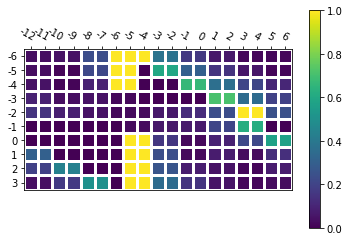

In [5]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """


    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

i_vals, j_vals, ratios = plot_knot_eigs(10,3)
import numpy as np

i_range = max(i_vals)-min(i_vals)
j_range = max(j_vals)-min(j_vals)

M = np.zeros((i_range, j_range))
for n in range(len(ratios)):
    M[i_vals[n], j_vals[n]] = ratios[n]

i_min = min(i_vals)
j_min = min(j_vals)

fig = plt.figure()
ax = fig.add_subplot()
heatmap(M, range(i_min, i_min + i_range), range(j_min, j_min + j_range))


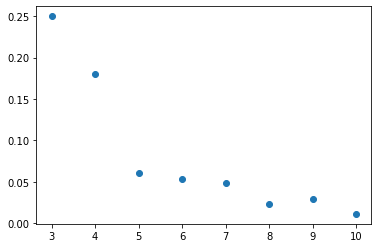

In [10]:

def get_min_eig_ratio(crossings):
    ratios = []
    
    max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    for index in range(1, max_indexes[crossings - 3] + 1):
        i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    return min(ratios)

max_ratios = []
for crossings in range(3,11):
    max_ratios.append(get_min_eig_ratio(crossings))

plt.scatter(range(3,11), max_ratios)
plt.show()

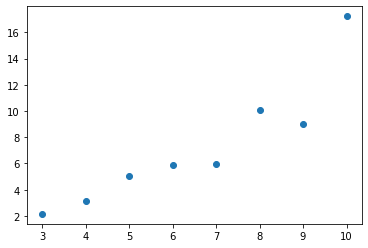

In [48]:
def get_mean_eig_ratio(crossings):
    ratios = []
    
    max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    for index in range(1, max_indexes[crossings - 3] + 1):
        i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    return np.array(ratios).mean()

mean_ratios = []
for crossings in range(3,11):
    mean_ratios.append(get_mean_eig_ratio(crossings))

plt.scatter(range(3,11), mean_ratios)
plt.show()


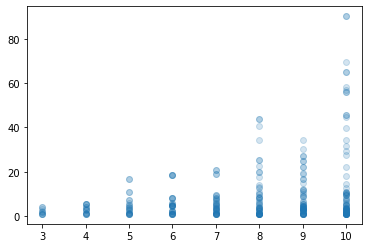

In [62]:
import random

n_samples = 10

def get_rand_eig_ratio(crossings):
    ratios = []
    
    max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    for index in range(1, max_indexes[crossings - 3] + 1):
        i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    return ratios

ratios = []
x_vals = []
for crossings in range(3,11):
    ret = get_rand_eig_ratio(crossings)
    ratios += ret
    x_vals += ([crossings] * len(ret))

plt.scatter(x_vals, ratios, alpha=0.1)
plt.show()